In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [3]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams.update({"font.size": 18})

# Utils

In [4]:
def build_dict_from_folder(folder_path):
    datasets_dict = {}
    for folder in os.listdir(folder_path):
        if os.path.isdir(os.path.join(folder_path, folder)):
            datasets_dict[folder] = {}
            for file in os.listdir(os.path.join(folder_path, folder)):
                feature_name = file.split(".")[0]
                datasets_dict[folder][feature_name] = pd.read_excel(
                    os.path.join(folder_path, folder, file)
                )
    return datasets_dict

# Load Data

In [5]:
data_folder = os.path.join("..", "data")

raw_data_folder = os.path.join(data_folder, "raw_data")

intermediate_data_folder = os.path.join(
    data_folder, "intermediate_data"
)

probabilities_folder = os.path.join(data_folder, "probabilities")

In [6]:
datasets_dict = build_dict_from_folder(intermediate_data_folder)

In [7]:
datasets_dict.keys()

dict_keys(['GUIAMETS', 'MEQUINENZA', 'XERTA', 'TORTOSA'])

In [8]:
tortosa_dfs = datasets_dict["TORTOSA"]
guiamets_dfs = datasets_dict["GUIAMETS"]
mequinenza_dfs = datasets_dict["MEQUINENZA"]
xerta_dfs = datasets_dict["XERTA"]

## Get Common Time Range for valid analysis

In [ ]:
# get common time range for all datasets
min_tortosa = max(
    min(tortosa_dfs[feature]["DateTime"])
    for feature in tortosa_dfs.keys()
)
max_tortosa = min(
    max(tortosa_dfs[feature]["DateTime"])
    for feature in tortosa_dfs.keys()
)

min_guiamets = max(
    min(guiamets_dfs[feature]["DateTime"])
    for feature in guiamets_dfs.keys()
)
max_guiamets = min(
    max(guiamets_dfs[feature]["DateTime"])
    for feature in guiamets_dfs.keys()
)

min_mequinenza = max(
    min(mequinenza_dfs[feature]["DateTime"])
    for feature in mequinenza_dfs.keys()
)
max_mequinenza = min(
    max(mequinenza_dfs[feature]["DateTime"])
    for feature in mequinenza_dfs.keys()
)

min_xerta = max(
    min(xerta_dfs[feature]["DateTime"]) for feature in xerta_dfs.keys()
)
max_xerta = min(
    max(xerta_dfs[feature]["DateTime"]) for feature in xerta_dfs.keys()
)

min_date = max(min_tortosa, min_guiamets, min_mequinenza, min_xerta)
max_date = min(max_tortosa, max_guiamets, max_mequinenza, max_xerta)

In [ ]:
for feature in tortosa_dfs.keys():
    tortosa_dfs[feature] = tortosa_dfs[feature].loc[
        (tortosa_dfs[feature]["DateTime"] >= min_date)
        & (tortosa_dfs[feature]["DateTime"] <= max_date)
    ]

for feature in guiamets_dfs.keys():
    guiamets_dfs[feature] = guiamets_dfs[feature].loc[
        (guiamets_dfs[feature]["DateTime"] >= min_date)
        & (guiamets_dfs[feature]["DateTime"] <= max_date)
    ]

for feature in mequinenza_dfs.keys():
    mequinenza_dfs[feature] = mequinenza_dfs[feature].loc[
        (mequinenza_dfs[feature]["DateTime"] >= min_date)
        & (mequinenza_dfs[feature]["DateTime"] <= max_date)
    ]

for feature in xerta_dfs.keys():
    xerta_dfs[feature] = xerta_dfs[feature].loc[
        (xerta_dfs[feature]["DateTime"] >= min_date)
        & (xerta_dfs[feature]["DateTime"] <= max_date)
    ]

# Tortosa

In [ ]:
for feature, df in tortosa_dfs.items():
    df = df.set_index("DateTime")

    all_dates = pd.date_range(
        start=df.index.min(), end=df.index.max(), freq="D"
    )
    df = df.reindex(all_dates, fill_value=None)

    df.reset_index(inplace=True)
    df.rename(columns={"index": "DateTime"}, inplace=True)
    tortosa_dfs[feature] = df

In [ ]:
feature, tortosa_df = list(tortosa_dfs.items())[0]

tortosa_df = tortosa_df[["DateTime", "Average"]]

tortosa_df.rename(columns={"Average": feature}, inplace=True)

for feature, df in list(tortosa_dfs.items())[1:]:
    df = df[["DateTime", "Average"]]
    df.rename(columns={"Average": feature}, inplace=True)
    tortosa_df = tortosa_df.merge(df, on="DateTime", how="inner")

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_3001/1994128918.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Average": feature}, inplace=True)
/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_3001/1994128918.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Average": feature}, inplace=True)
/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_3001/1994128918.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [ ]:
tortosa_df

,DateTime,cumulated_rainfall_24h,turbidity,watertemperature,conductivity,flowriver
0,2012-08-29,0.0,4.42,27.75,1412.61,100.82
1,2012-08-30,0.4,0.99,26.78,1003.79,97.40
2,2012-08-31,0.0,1.08,25.35,1371.54,95.59
3,2012-09-01,0.0,7.96,23.93,1390.08,94.97
4,2012-09-02,0.0,2.92,23.30,1394.38,95.48
...,...,...,...,...,...,...
4045,2023-09-26,0.0,1.86,25.51,1424.07,83.50
4046,2023-09-27,0.0,2.77,26.05,1403.93,81.17
4047,2023-09-28,0.0,2.07,26.35,1390.99,81.42
4048,2023-09-29,0.0,1.59,26.54,1392.94,80.71


In [ ]:
# drop turbidity since it has a lot of missing values
tortosa_df = tortosa_df.drop(columns=["turbidity"])

# Guiamets

In [ ]:
for feature, df in guiamets_dfs.items():
    df = df.set_index("DateTime")

    all_dates = pd.date_range(
        start=df.index.min(), end=df.index.max(), freq="D"
    )
    df = df.reindex(all_dates, fill_value=None)

    df.reset_index(inplace=True)
    df.rename(columns={"index": "DateTime"}, inplace=True)
    guiamets_dfs[feature] = df

In [ ]:
feature, guiamets_df = list(guiamets_dfs.items())[0]

guiamets_df = guiamets_df[["DateTime", "Average"]]

guiamets_df.rename(columns={"Average": feature}, inplace=True)

for feature, df in list(guiamets_dfs.items())[1:]:
    df = df[["DateTime", "Average"]]
    df.rename(columns={"Average": feature}, inplace=True)
    guiamets_df = guiamets_df.merge(df, on="DateTime", how="inner")

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_3001/1136476845.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Average": feature}, inplace=True)


In [ ]:
guiamets_df

,DateTime,cumulated_rainfall_24h,environmental_temperature
0,2012-08-29,0.0,27.02
1,2012-08-30,1.6,22.49
2,2012-08-31,0.0,21.03
3,2012-09-01,0.0,17.81
4,2012-09-02,0.0,19.43
...,...,...,...
4045,2023-09-26,0.0,20.50
4046,2023-09-27,0.0,21.76
4047,2023-09-28,0.0,22.17
4048,2023-09-29,0.0,22.03


# Mequinenza

In [ ]:
for feature, df in mequinenza_dfs.items():
    print(feature)
    print()
    print(df.isna().sum())
    print()
    print("Min date:", df["DateTime"].min())
    print()
    print("Max date:", df["DateTime"].max())
    print()
    print("-" * 100)

cumulated_rainfall_24h

Average     0
DateTime    0
dtype: int64

Min date: 2012-08-29 00:00:00

Max date: 2023-09-30 00:00:00

----------------------------------------------------------------------------------------------------


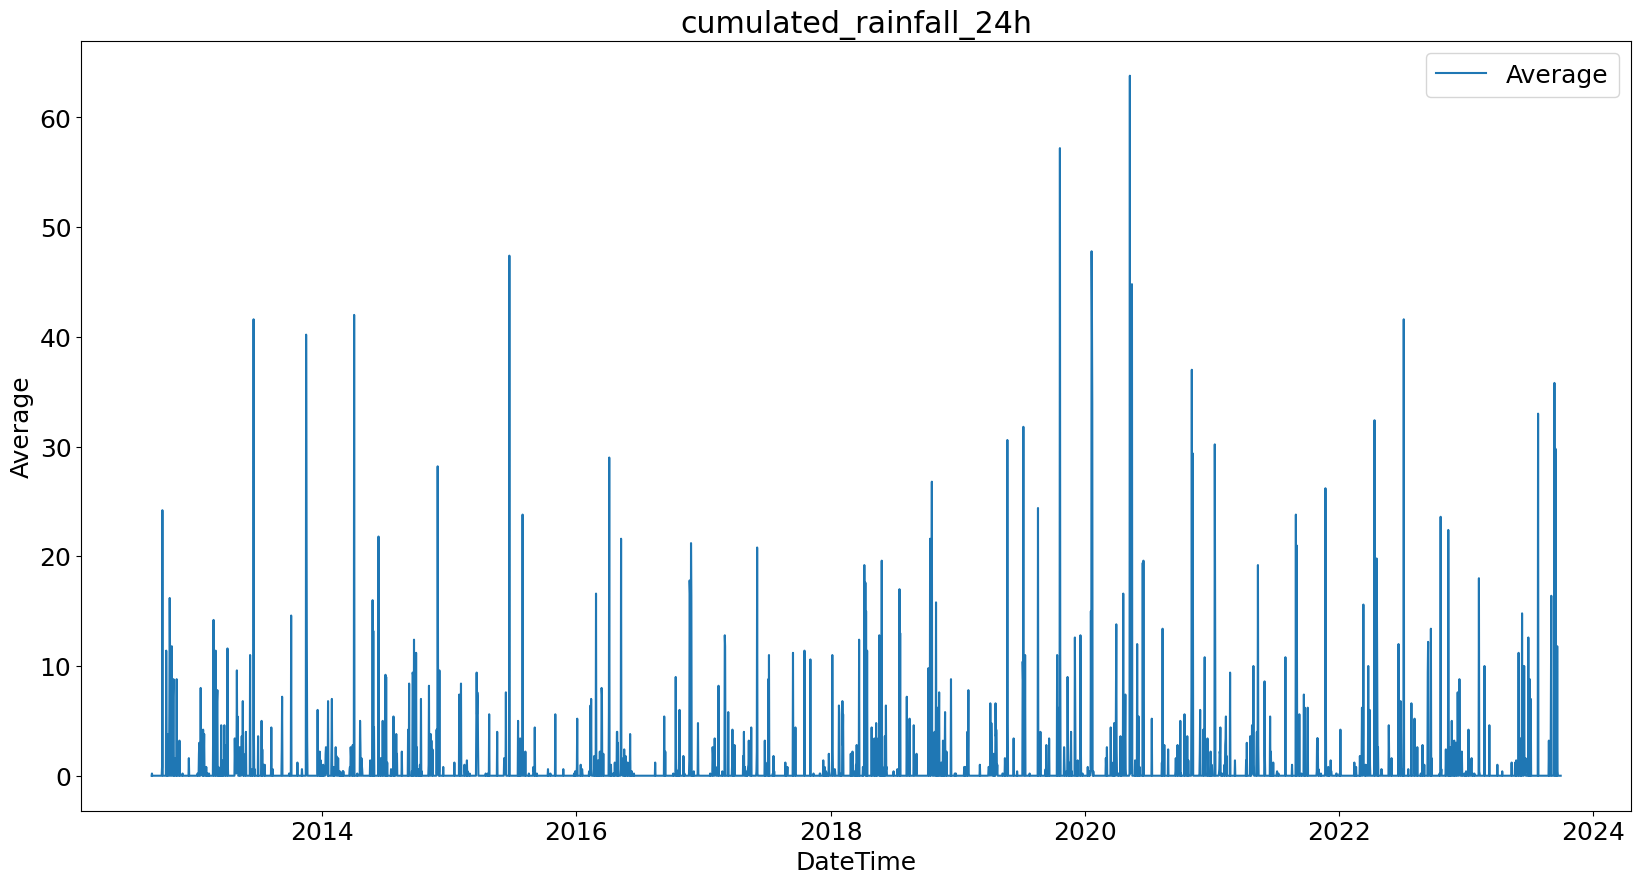

In [ ]:
for feature, df in mequinenza_dfs.items():
    plt.figure(figsize=(20, 10))
    sns.lineplot(data=df, x="DateTime", y="Average", label="Average")
    # if 'Maximum' in df.columns:
    #     sns.lineplot(data=df, x='DateTime', y='Maximum', label='Maximum')
    # if 'Minimum' in df.columns:
    #     sns.lineplot(data=df, x='DateTime', y='Minimum', label='Minimum')
    plt.title(feature)
    plt.legend()
    plt.show()

# Xerta

In [ ]:
for feature, df in xerta_dfs.items():
    print(feature)
    print()
    print(df.isna().sum())
    print()
    print("Min date:", df["DateTime"].min())
    print()
    print("Max date:", df["DateTime"].max())
    print()
    print("-" * 100)

nitrate

DateTime    0
Average     0
Minimum     0
Maximum     0
Nºdat       0
NºOK        0
dtype: int64

Min date: 2012-08-29 00:00:00

Max date: 2023-09-30 00:00:00

----------------------------------------------------------------------------------------------------
pH

DateTime    0
Average     0
Minimum     0
Maximum     0
Nºdat       0
NºOK        0
dtype: int64

Min date: 2012-08-29 00:00:00

Max date: 2023-09-30 00:00:00

----------------------------------------------------------------------------------------------------
turbidity

DateTime    0
Average     0
Minimum     0
Maximum     0
Nºdat       0
NºOK        0
dtype: int64

Min date: 2012-08-29 00:00:00

Max date: 2023-09-30 00:00:00

----------------------------------------------------------------------------------------------------
Ammonium

DateTime    0
Average     0
Minimum     0
Maximum     0
Nºdat       0
NºOK        0
dtype: int64

Min date: 2012-08-29 00:00:00

Max date: 2023-09-30 00:00:00

-----------------------

In [ ]:
for feature, df in xerta_dfs.items():
    df = df.set_index("DateTime")

    all_dates = pd.date_range(
        start=df.index.min(), end=df.index.max(), freq="D"
    )
    df = df.reindex(all_dates, fill_value=None)

    df.reset_index(inplace=True)
    df.rename(columns={"index": "DateTime"}, inplace=True)
    xerta_dfs[feature] = df

In [ ]:
feature, xerta_df = list(xerta_dfs.items())[0]

xerta_df = xerta_df[["DateTime", "Average"]]

xerta_df.rename(columns={"Average": feature}, inplace=True)

for feature, df in list(xerta_dfs.items())[1:]:
    df = df[["DateTime", "Average"]]
    df.rename(columns={"Average": feature}, inplace=True)
    xerta_df = xerta_df.merge(df, on="DateTime", how="inner")

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_3001/2325347798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xerta_df.rename(columns={"Average": feature}, inplace=True)
/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_3001/2325347798.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Average": feature}, inplace=True)
/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_3001/2325347798.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [ ]:
xerta_df

,DateTime,nitrate,pH,turbidity,Ammonium,dissolvedoxygen,watertemperature,Conductivity,redoxpotential,ABS254
0,2012-08-29,5.54,8.31,3.42,0.01,4.71,28.10,1144.98,220.47,9.07
1,2012-08-30,5.56,8.29,3.10,0.02,4.75,27.57,1205.67,225.81,15.13
2,2012-08-31,5.51,8.31,3.60,0.04,5.08,26.37,1237.20,229.83,15.95
3,2012-09-01,5.49,8.40,4.00,0.06,5.68,25.04,1254.15,231.82,NaN
4,2012-09-02,5.39,8.43,3.97,0.15,5.98,24.75,1244.10,234.80,15.10
...,...,...,...,...,...,...,...,...,...,...
4045,2023-09-26,7.56,8.30,3.96,0.03,5.46,25.95,1628.49,227.69,3.97
4046,2023-09-27,7.28,8.29,4.16,0.02,5.33,26.37,1610.67,227.02,3.81
4047,2023-09-28,7.34,8.27,3.80,0.02,5.23,26.60,1602.33,228.25,3.76
4048,2023-09-29,7.64,8.25,3.89,0.03,5.17,26.73,1613.81,230.54,4.18


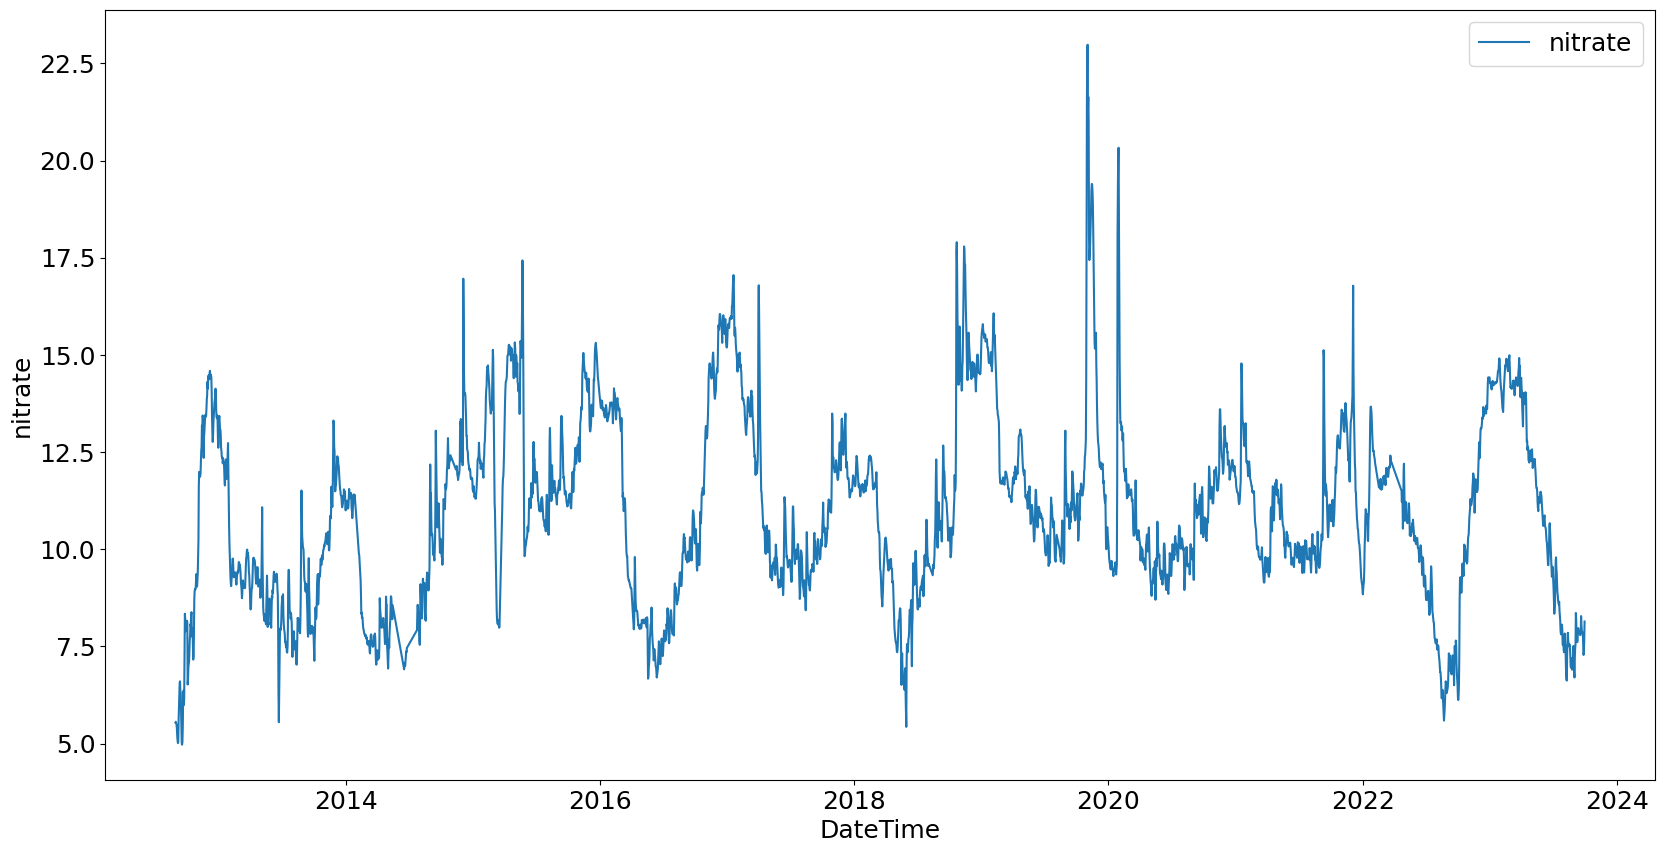

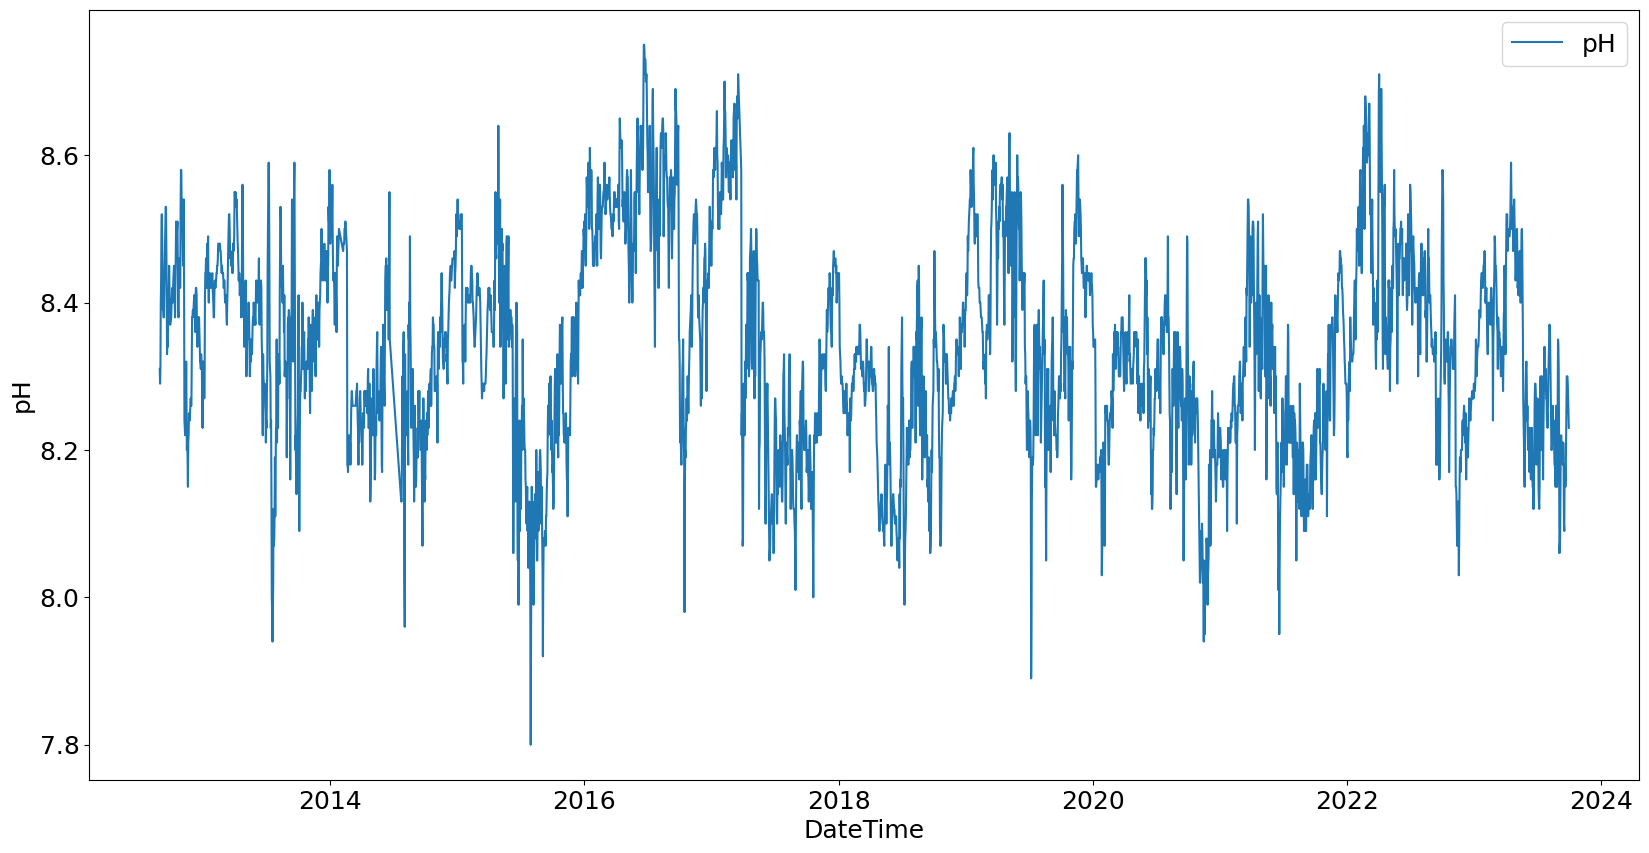

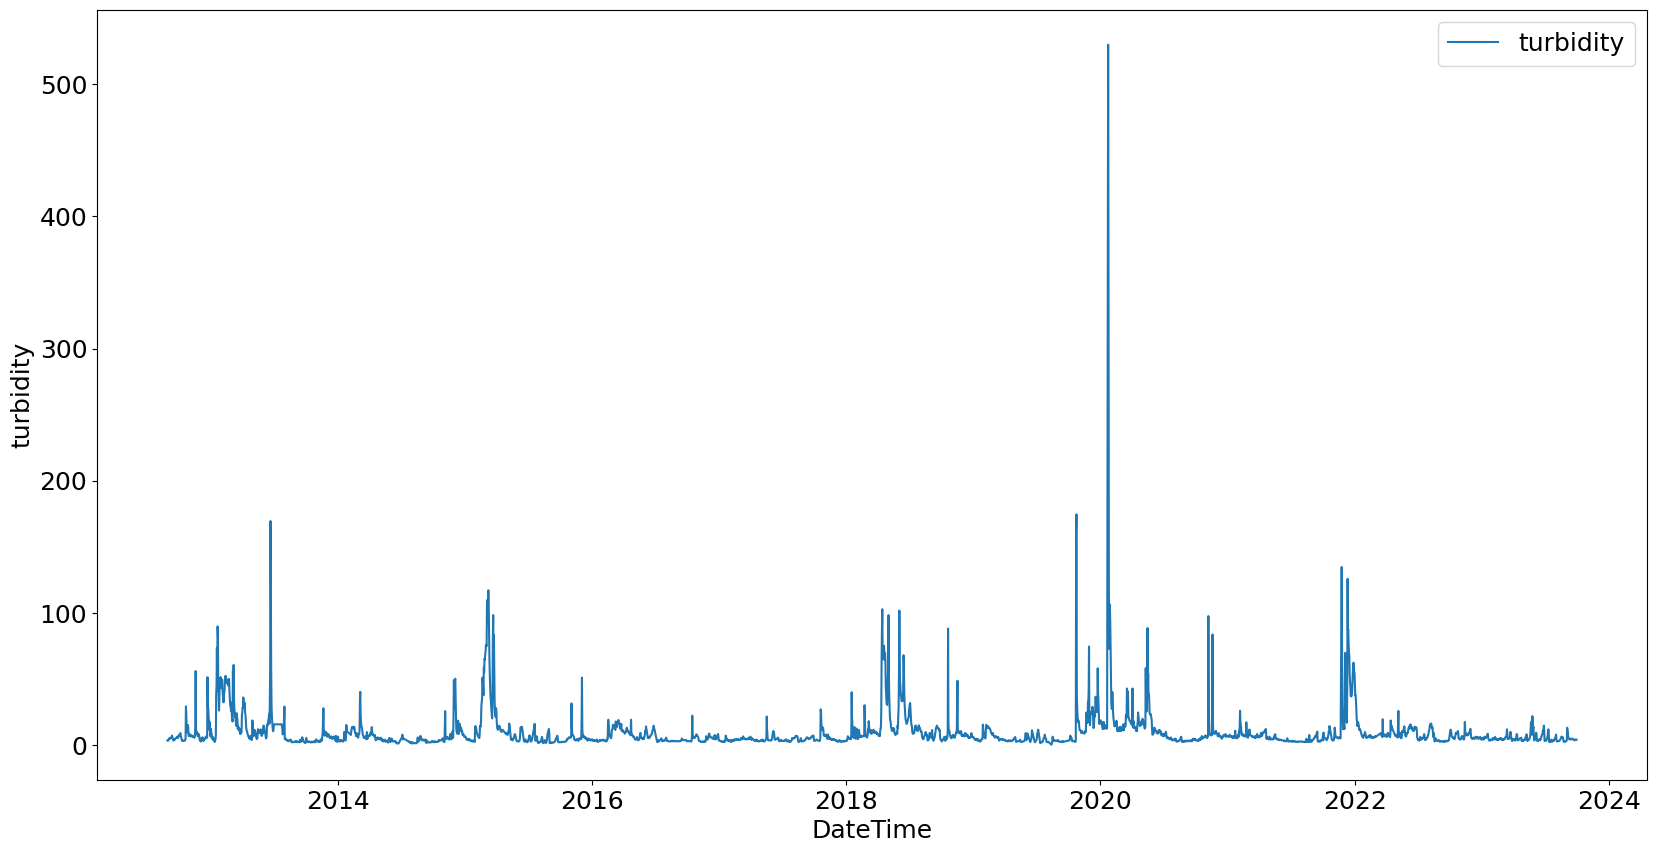

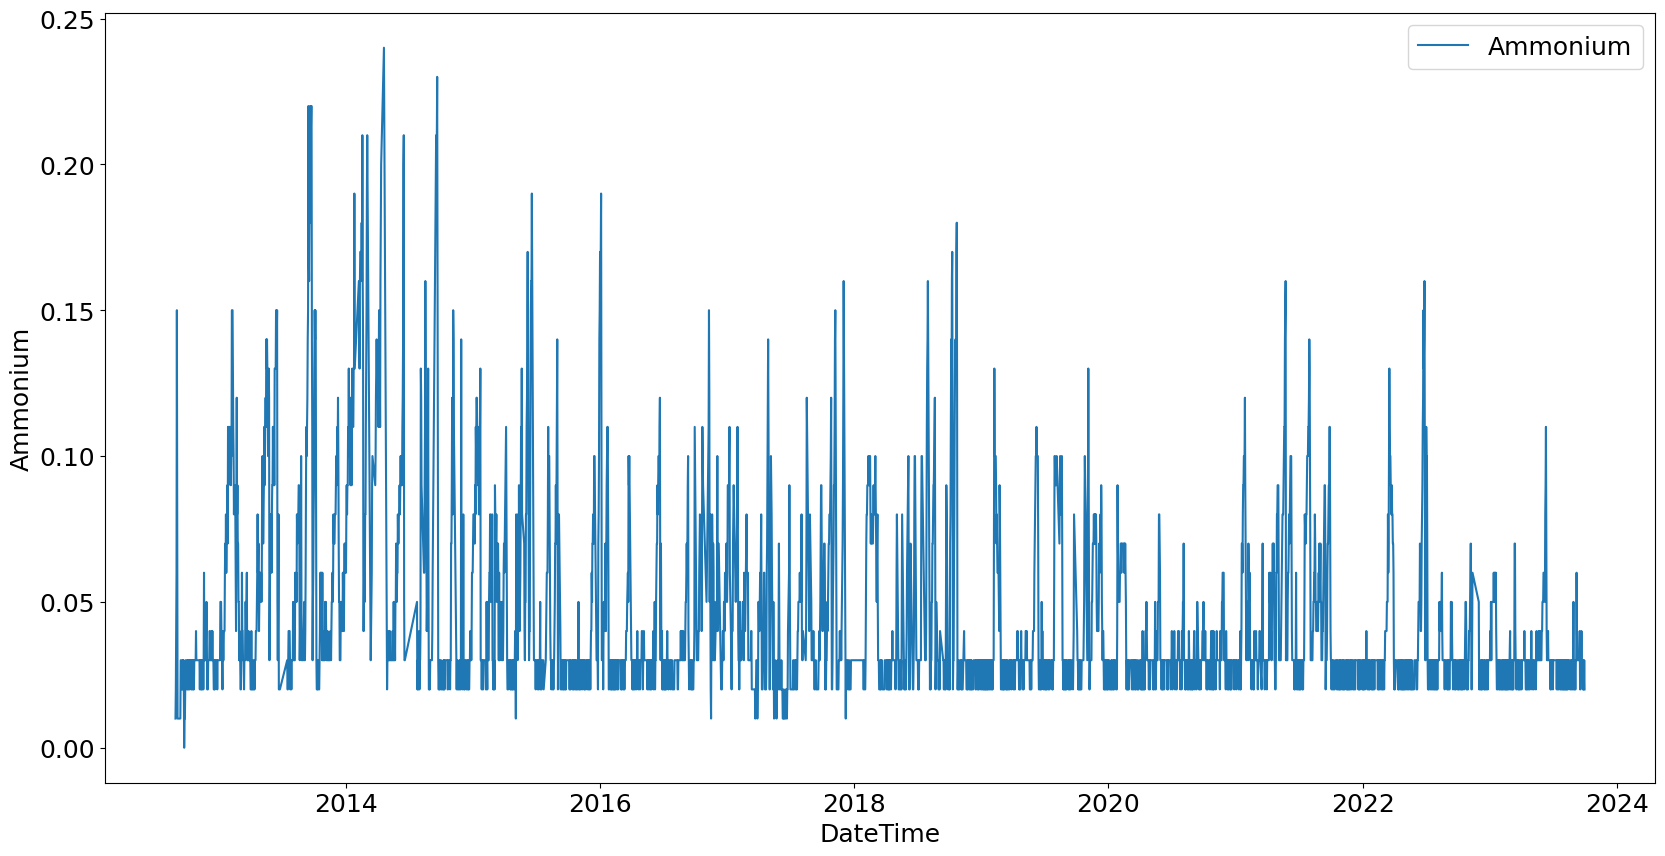

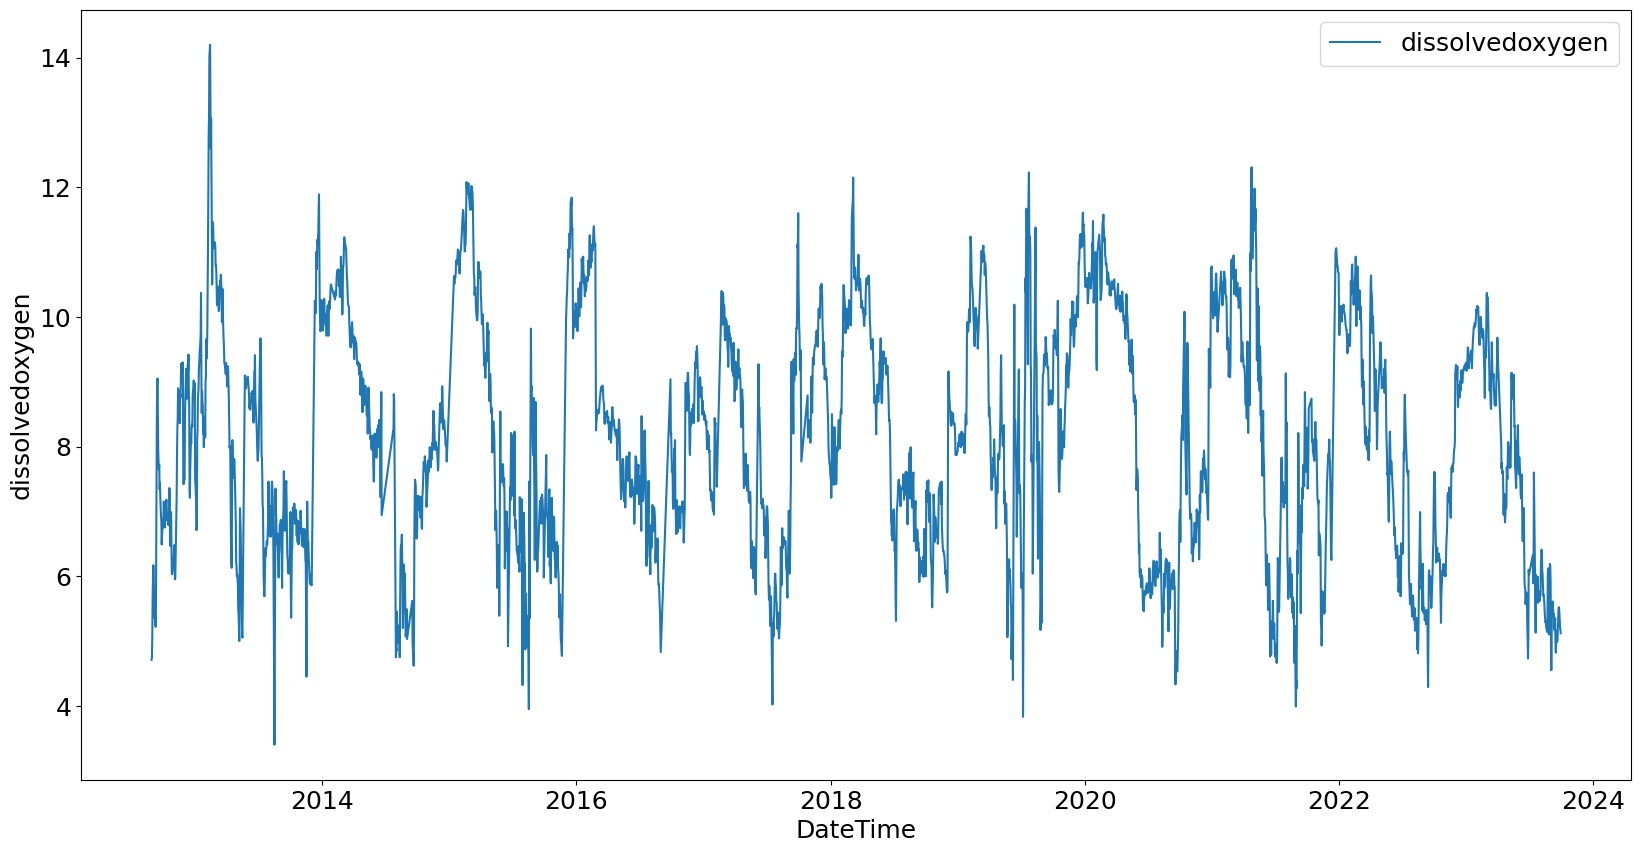

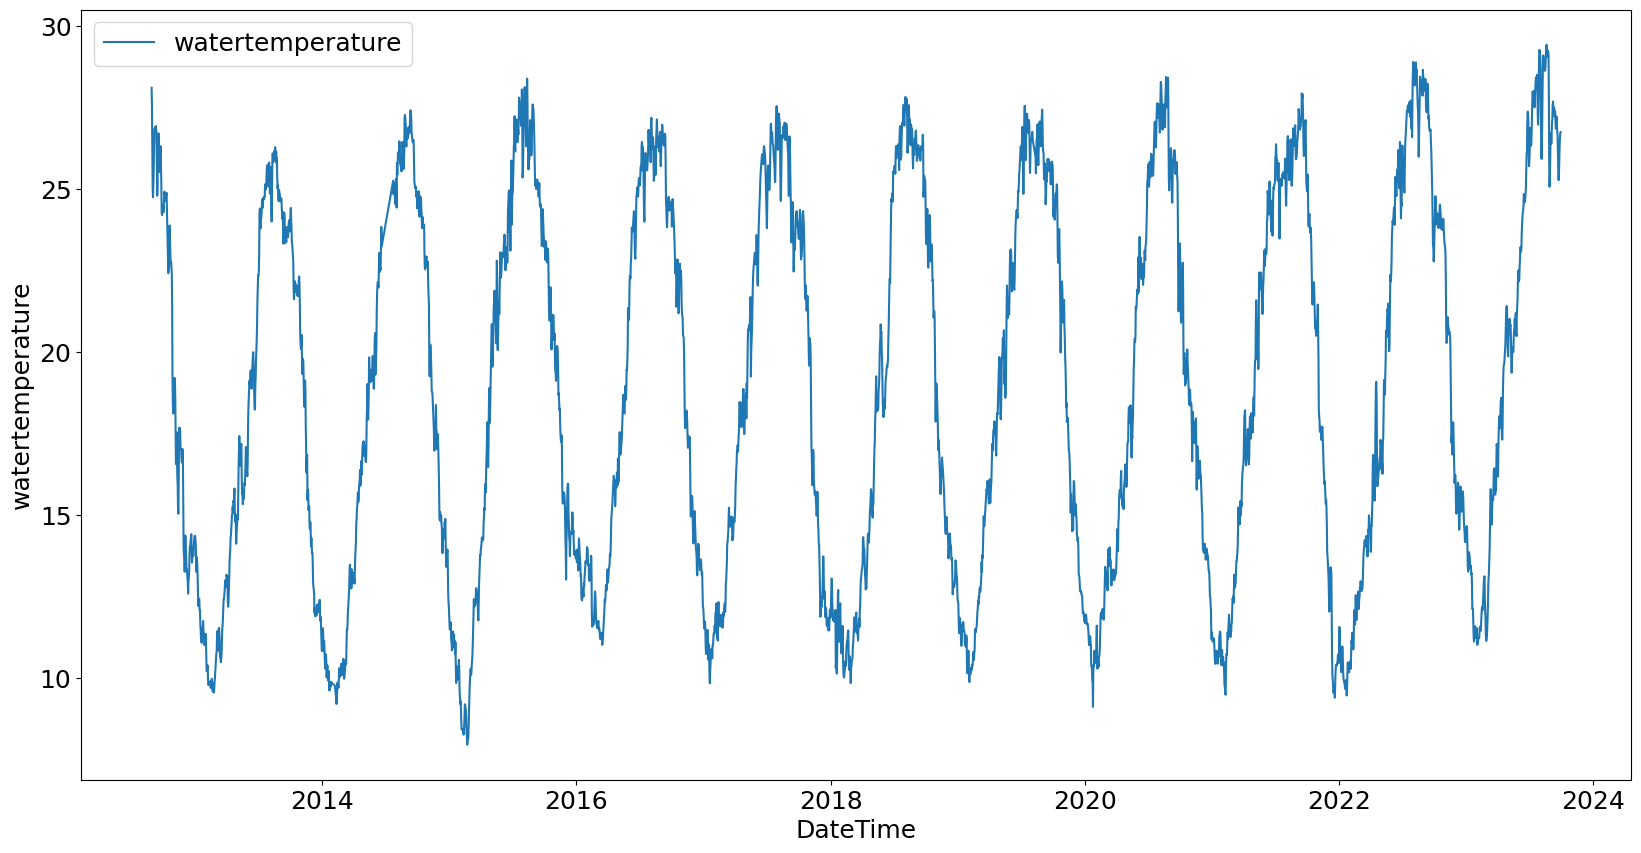

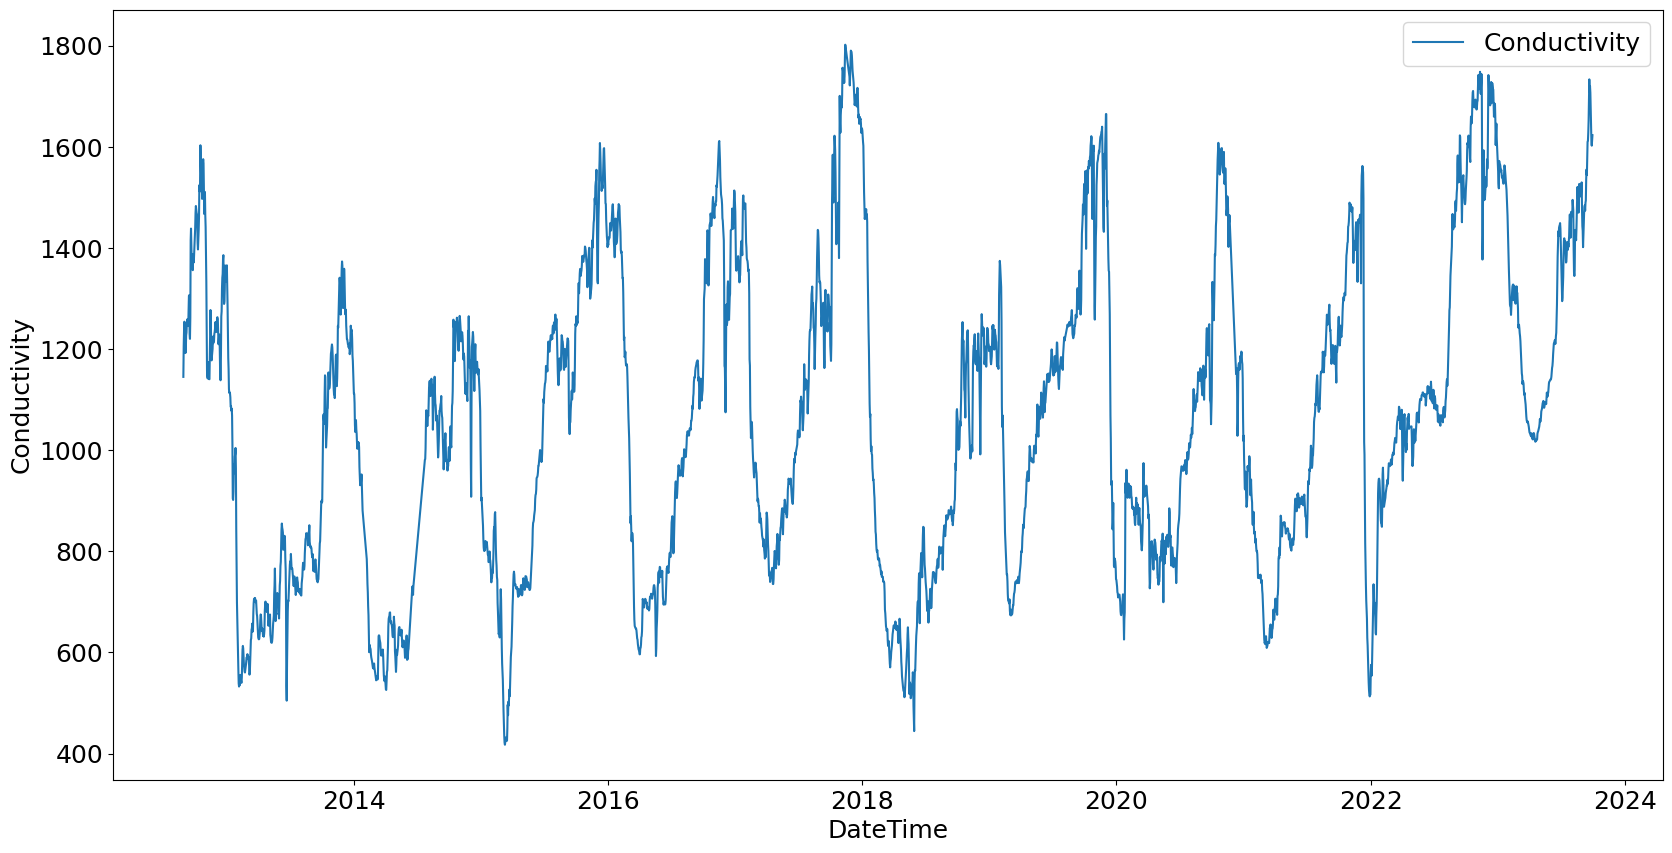

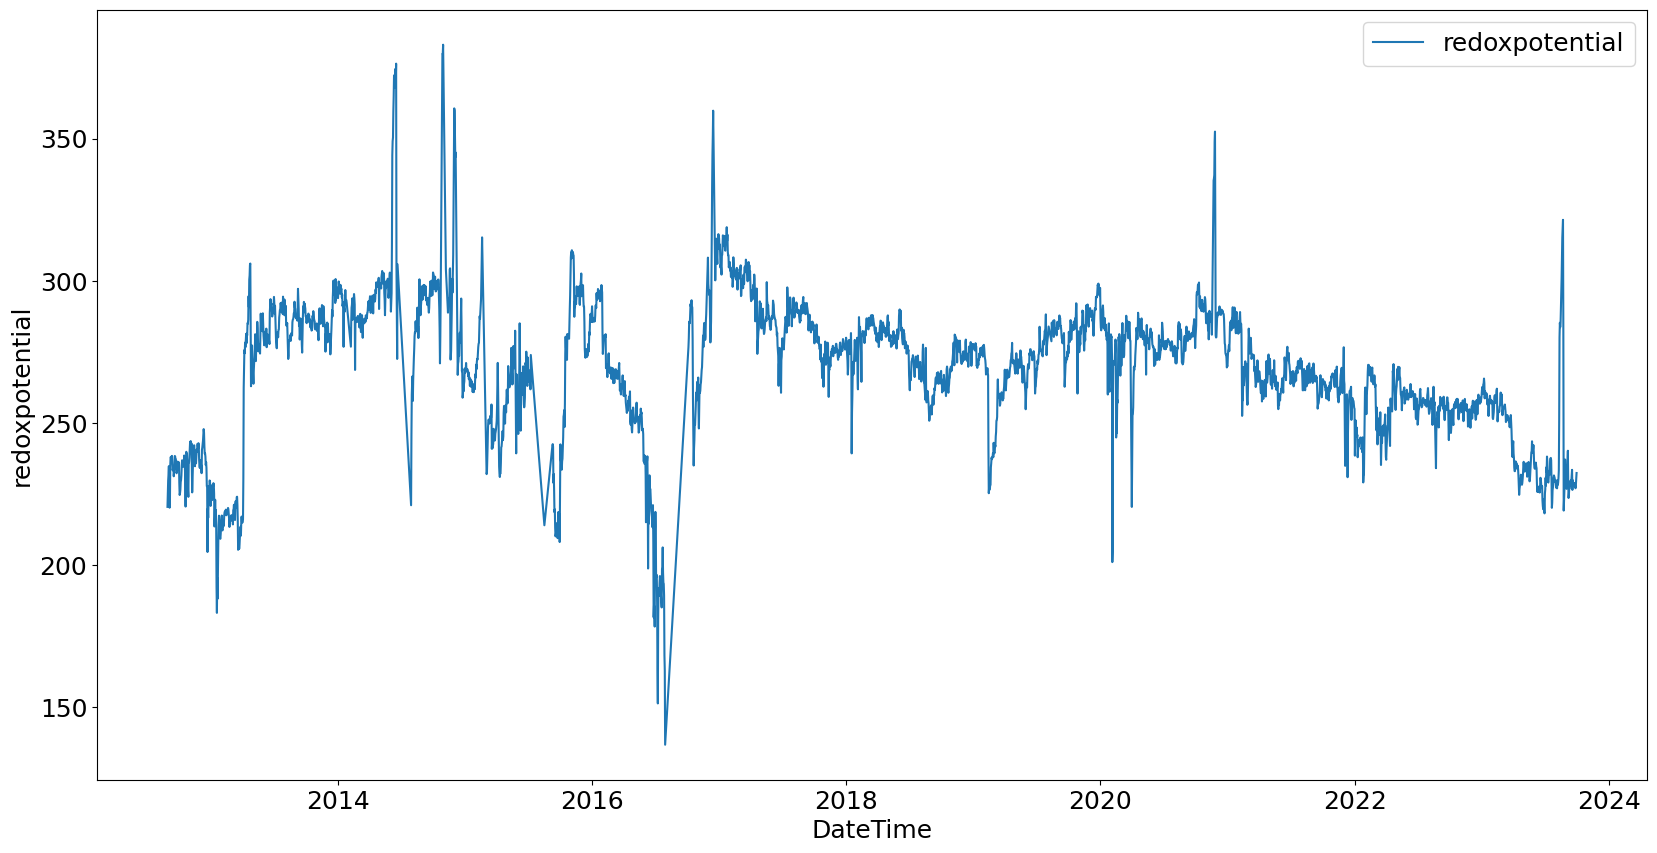

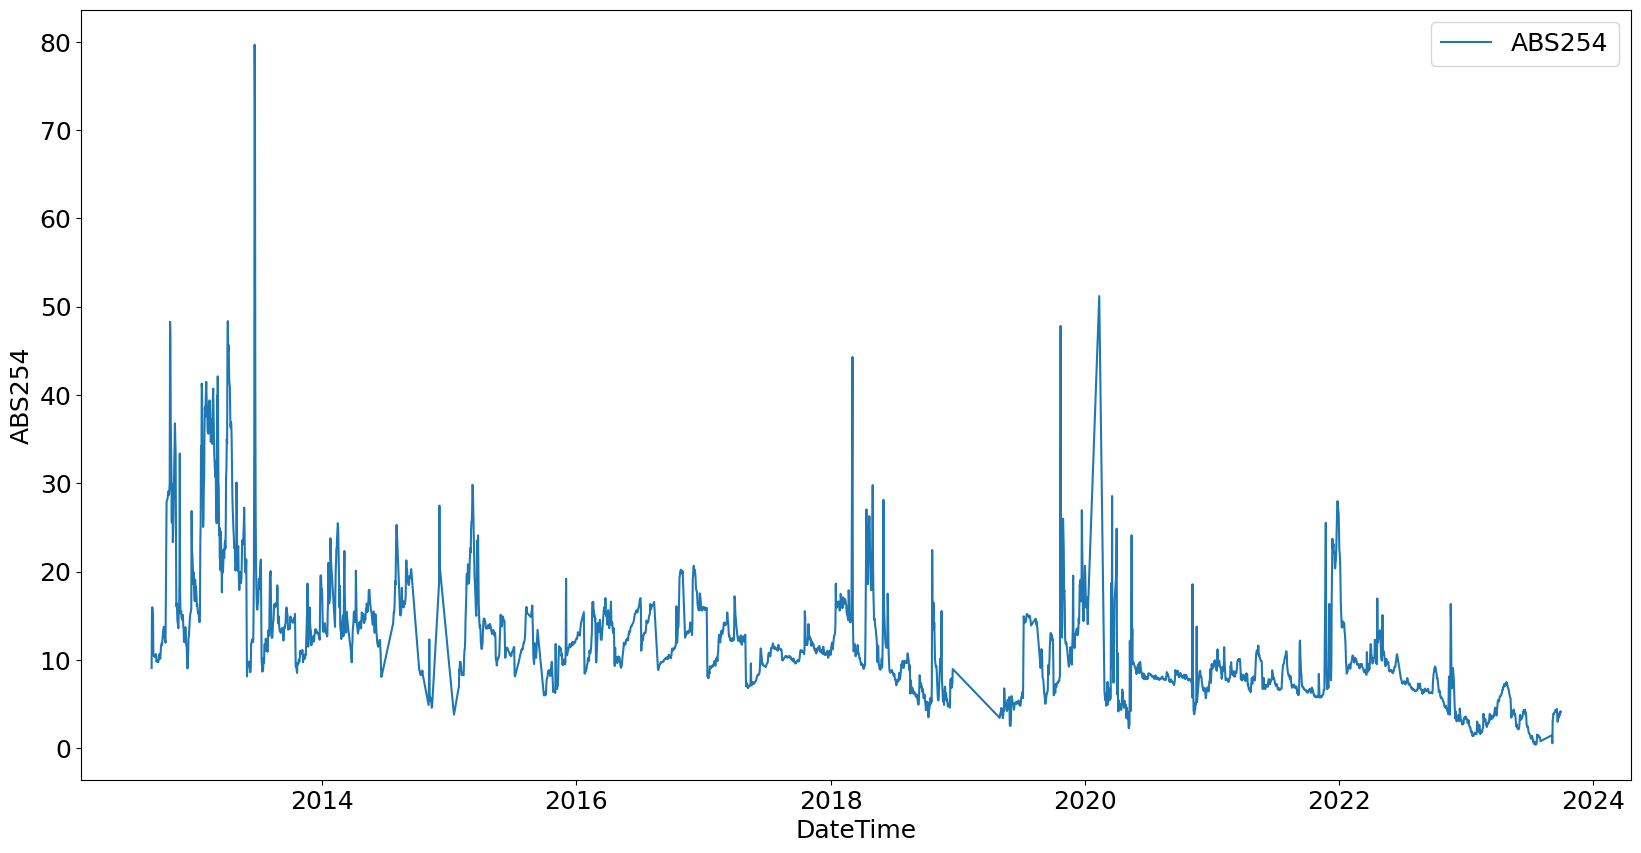

In [ ]:
for feature in xerta_df.columns[1:]:
    plt.figure()
    sns.lineplot(x="DateTime", y=feature, data=xerta_df, label=feature)

<Axes: ylabel='ABS254'>

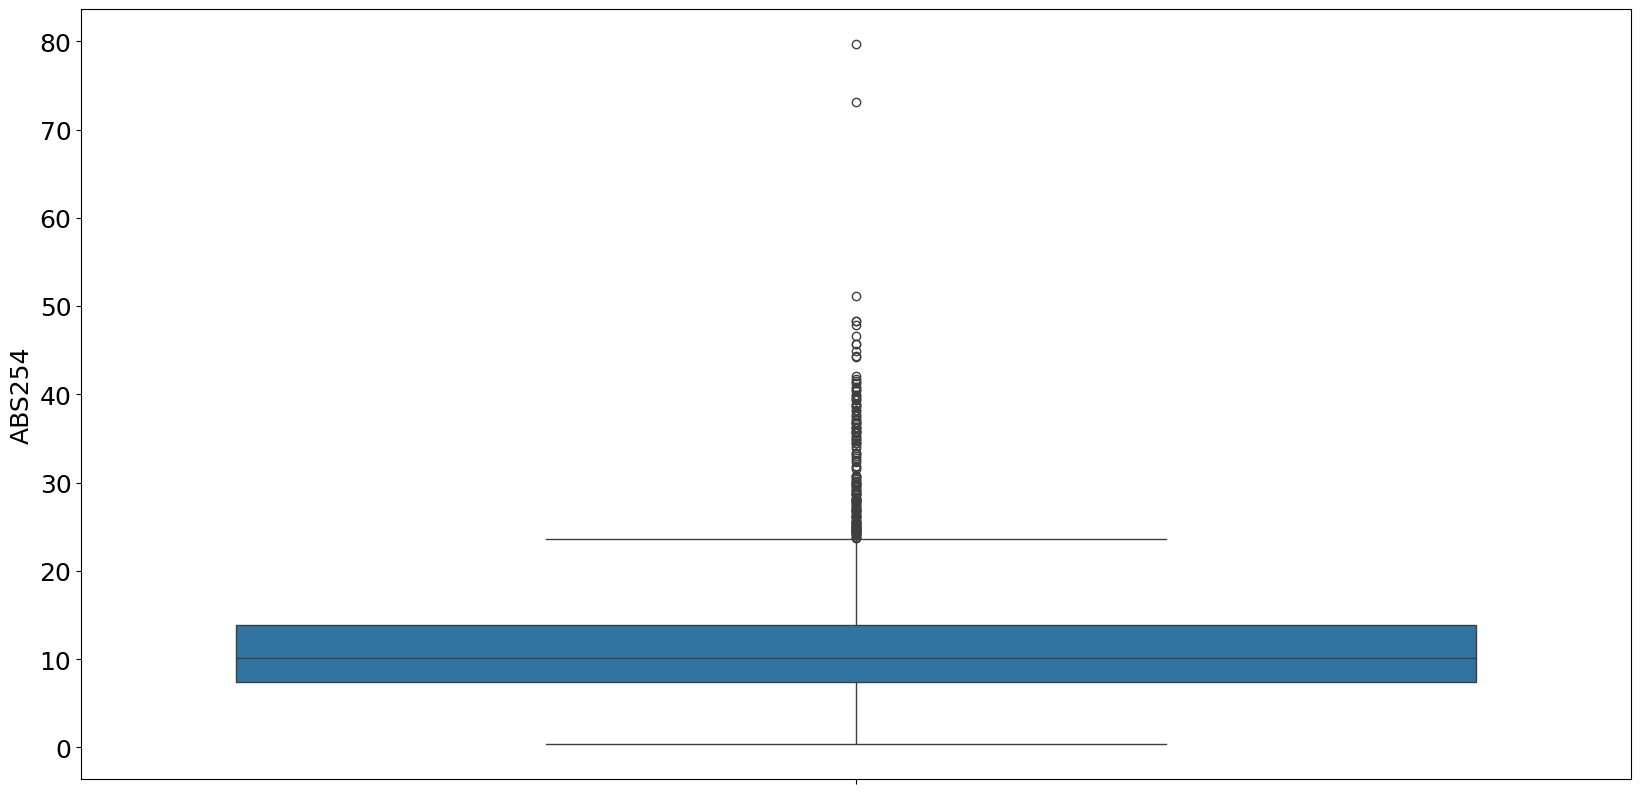

In [ ]:
sns.boxplot(data=xerta_df["ABS254"])

# Compare Common Variables

## Rainfall

In [12]:
tortosa_dfs.keys()

dict_keys(['cumulated_rainfall_24h', 'turbidity', 'watertemperature', 'conductivity', 'flowriver'])

<Axes: xlabel='DateTime', ylabel='Average'>

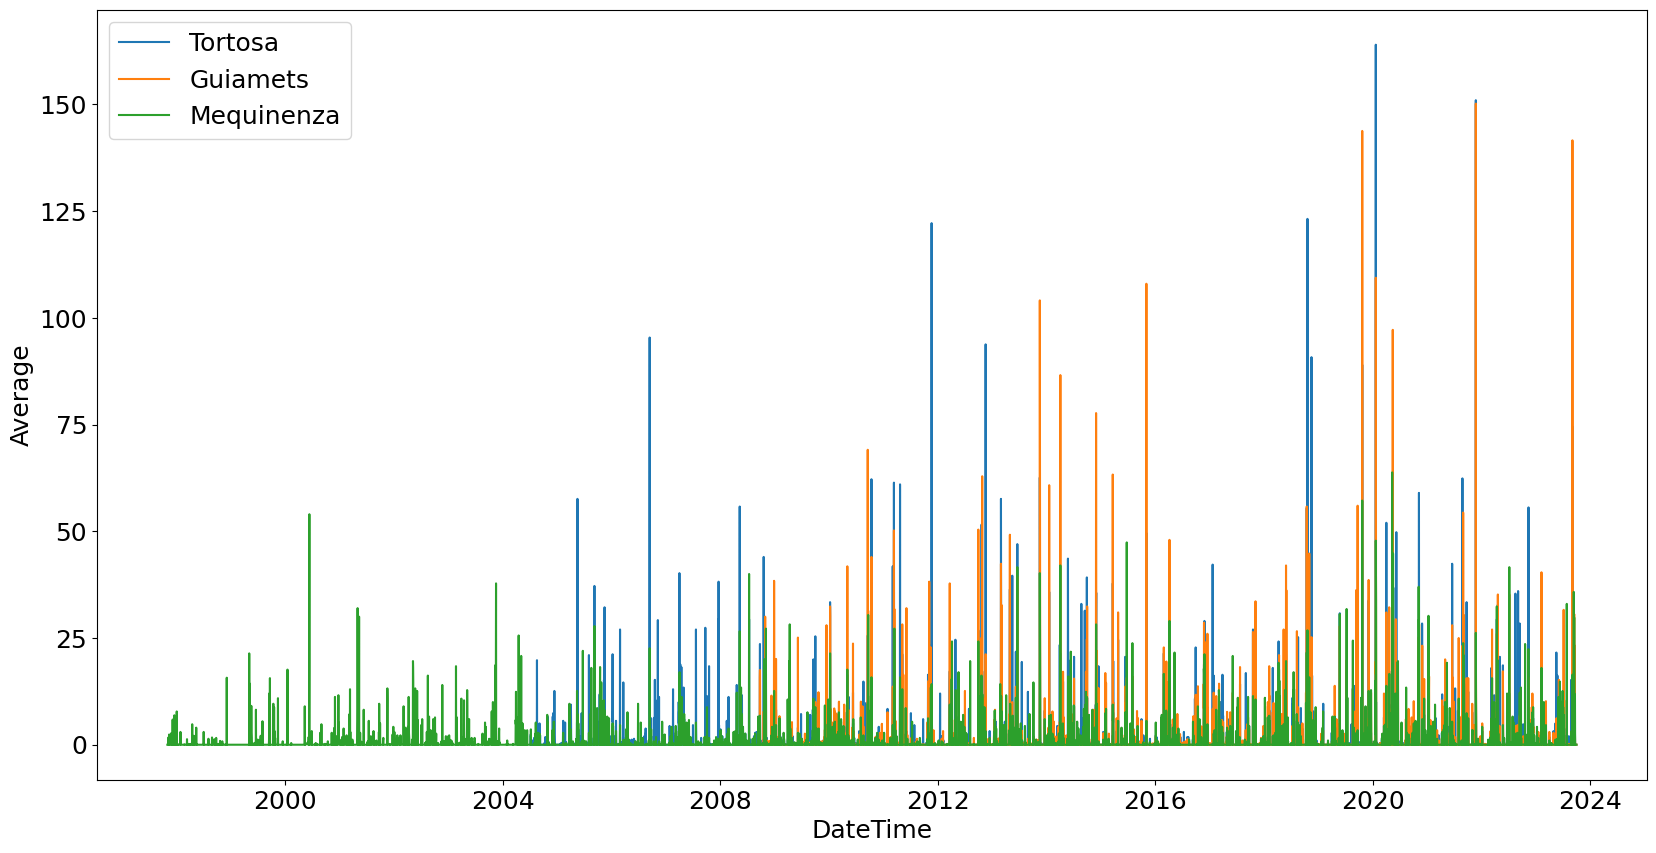

In [15]:
# plot the rainfall from tortosa, guitames and mequinenza
plt.figure()

sns.lineplot(
    data=tortosa_dfs["cumulated_rainfall_24h"],
    x="DateTime",
    y="Average",
    label="Tortosa",
)
sns.lineplot(
    data=guiamets_dfs["cumulated_rainfall_24h"],
    x="DateTime",
    y="Average",
    label="Guiamets",
)
sns.lineplot(
    data=mequinenza_dfs["cumulated_rainfall_24h"],
    x="DateTime",
    y="Average",
    label="Mequinenza",
)